In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
subregions = {'r1': df.Region(p1=(-50e-9, -50e-9, 0), p2=(0, 50e-9, 10e-9)),
              'r2': df.Region(p1=(0, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))}
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), subregions=subregions)

system = mm.System(name='fs')

system.energy = mm.Zeeman(H=(0, 0, 1e6))
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.1)

Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 10:35]... (1.1 s)


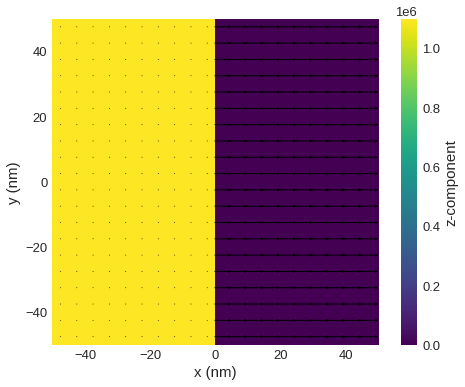

In [2]:
# minimize the energy
td = mc.TimeDriver()
td.drive(system, t=2e-9, n=10, fixed_subregions=['r2'])

# md = mc.MinDriver()
# md.drive(system, fixed_spins=['r1'])

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [10]:
system.m.orientation((20e-9, 0, 0))

(-4.442735338975327e-15, 1.7235714499718818e-16, 1.0)

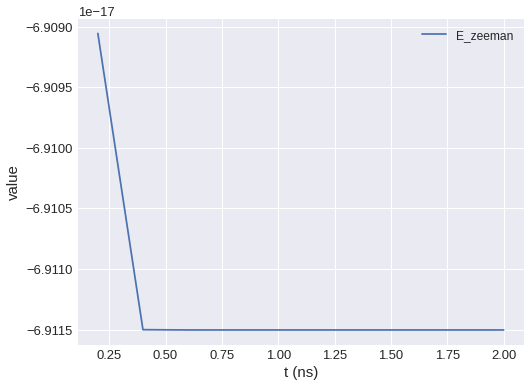

In [4]:
system.table.mpl(yaxis=['E_zeeman'])

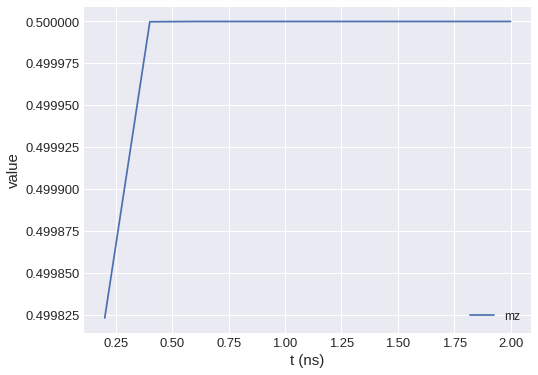

In [5]:
system.table.mpl(yaxis=['mz'])

In [6]:
system.table

              E  E_calc_count     max_dm/dt         dE/dt       delta_E  \
0 -6.909057e-17         271.0  3.356252e+02 -1.071770e-09 -5.081754e-21   
1 -6.911501e-17         398.0  1.058169e+01 -1.065375e-12 -9.521797e-24   
2 -6.911504e-17         519.0  3.918788e-01 -1.461155e-15 -1.259405e-26   
3 -6.911504e-17         640.0  1.451038e-02 -2.003318e-18 -1.728768e-29   
4 -6.911504e-17         761.0  5.372873e-04 -2.746666e-21 -1.164153e-32   
5 -6.911504e-17         882.0  1.989457e-05 -3.765838e-24  0.000000e+00   
6 -6.911504e-17        1003.0  7.366520e-07 -5.163182e-27  0.000000e+00   
7 -6.911504e-17        1124.0  2.727660e-08 -7.079022e-30  0.000000e+00   
8 -6.911504e-17        1245.0  1.009993e-09 -9.705750e-33  0.000000e+00   
9 -6.911504e-17        1360.0  5.608847e-11 -2.993228e-35  0.000000e+00   

       E_zeeman  iteration  stage_iteration  stage        mx            my  \
0 -6.909057e-17       44.0             44.0    0.0  0.513103 -2.293674e-03   
1 -6.911501e-17   

In [7]:
import micromagneticmodel as mm

In [8]:
mm.__version__

'0.8.22'